# Purpose:
The purpose of this notebook is to find the best writers and directors based on the genres we have determined are most profitable. This is determined by doing the following:
1. Determine if writers and directors should be selected by box office numbers or critcal reception
2. Select top writers and directors for a given genre

First step is to import relevant libraries and read information from Rotten Tomatoes

In [146]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

rt_movie_details_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', sep='\t')
rt_reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', sep='\t', encoding='unicode_escape')

By default, box office numbers are shown as an object. We need to change these values to floats so that they can correctly be sorted by highest to lowest amounts.

In [147]:
rt_movie_details_df.dropna(subset=['box_office'], inplace=True)
#Need to remove commas from box office numbers, otherwise they cannot be converted to float
rt_movie_details_df['box_office'] = rt_movie_details_df['box_office'].str.replace(',','')
rt_movie_details_df['box_office'] = rt_movie_details_df['box_office'].astype('float')

By default, genres are shown as a string. This is not an issue for movies that fit into a single genre, but when there are multiple genres, it is difficult to categorize movies.

A new column is created that lists all of the individual genres listed in the genre column.

In [148]:
rt_movie_details_df['genre_list'] = rt_movie_details_df['genre'].str.split('|')
rt_movie_details_df

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_list
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]"
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915.0,82 minutes,Paramount Pictures,[Comedy]
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114.0,123 minutes,Sony Pictures Classics,[Drama]
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,134904.0,117 minutes,NaN,[Drama]
15,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869.0,108 minutes,ATO Pictures,"[Comedy, Drama, Mystery and Suspense]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1980,A band of renegades on the run in outer space ...,PG-13,Action and Adventure|Science Fiction and Fantasy,Joss Whedon,Joss Whedon,"Sep 30, 2005","Dec 20, 2005",$,25335935.0,119 minutes,Universal Pictures,"[Action and Adventure, Science Fiction and Fan..."
1542,1981,"Money, Fame and the Knowledge of English. In I...",NR,Comedy|Drama,Gauri Shinde,Gauri Shinde,"Oct 5, 2012","Nov 20, 2012",$,1416189.0,129 minutes,Eros Entertainment,"[Comedy, Drama]"
1545,1985,A woman who joins the undead against her will ...,R,Horror|Mystery and Suspense,Sebastian Gutierrez,Sebastian Gutierrez,"Jun 1, 2007","Oct 9, 2007",$,59371.0,98 minutes,IDP Distribution,"[Horror, Mystery and Suspense]"
1546,1986,Aki Kaurismaki's The Man Without a Past opens ...,PG,Art House and International|Comedy|Drama,NaN,NaN,"Aug 30, 2002","Oct 7, 2003",$,794306.0,97 minutes,NaN,"[Art House and International, Comedy, Drama]"


So far, our dataframe gives us information about box office, but does not give information about quality of the films. We can review our other table for review information.

In [149]:
rt_reviews_df

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


The review dataframe has two columns that give information on quality: rating and fresh. The rating column could give us good numeric values, but the system is inconsistent and has missing values. The fresh column is consistent, but we need to convert to a number. There are two possibilities: fresh and rotten. We can assign fresh to 1 and rotten to 0, and get a mean of the scores to get the "freshness" of the movie.

In [150]:
rt_reviews_df.replace(to_replace='fresh', value=1, inplace=True)
rt_reviews_df.replace(to_replace='rotten', value=0, inplace=True)

In [151]:
rt_freshness = rt_reviews_df.groupby('id').mean()
rt_freshness

,fresh,top_critic
id,,
3,0.631902,0.208589
5,0.782609,0.217391
6,0.561404,0.333333
8,0.746667,0.293333
10,0.462963,0.259259
...,...,...
1996,0.671329,0.265734
1997,0.357143,0.321429
1998,1.000000,0.000000


We are now ready to merge the reviews onto the main table, and drop null values.

In [152]:
movie_details_rated_df = rt_movie_details_df.merge(rt_freshness, how='left', left_on='id', right_on='id')
movie_details_rated_df.head(20)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_list,fresh,top_critic
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]",0.631902,0.208589
1,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915.0,82 minutes,Paramount Pictures,[Comedy],0.462963,0.259259
2,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114.0,123 minutes,Sony Pictures Classics,[Drama],0.642105,0.336842
3,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,134904.0,117 minutes,NaN,[Drama],0.142857,0.428571
4,22,Two-time Academy Award Winner Kevin Spacey giv...,R,Comedy|Drama|Mystery and Suspense,George Hickenlooper,Norman Snider,"Dec 17, 2010","Apr 5, 2011",$,1039869.0,108 minutes,ATO Pictures,"[Comedy, Drama, Mystery and Suspense]",NaN,NaN
5,23,A fictional film set in the alluring world of ...,R,Drama,NaN,NaN,"Dec 20, 2013","Mar 18, 2014",$,99165609.0,129 minutes,Sony Pictures,[Drama],0.914163,0.188841
6,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224.0,127 minutes,Universal Pictures,"[Action and Adventure, Drama, Science Fiction ...",0.108108,0.243243
7,26,A comic series of short vignettes build on one...,R,Art House and International|Comedy|Drama|Music...,Jim Jarmusch,Jim Jarmusch,"May 14, 2004","Sep 21, 2004",$,1971135.0,96 minutes,MGM,"[Art House and International, Comedy, Drama, M...",0.635593,0.279661
8,40,John Sayles' Casa de los Babys tells the tale ...,R,Drama,John Sayles,John Sayles,"Sep 19, 2003","Apr 13, 2004",$,312136.0,95 minutes,NaN,[Drama],0.565657,0.292929
9,41,"Ken Loach directs Sweet Sixteen, a gritty dram...",R,Drama,Ken Loach,Paul Laverty,"May 16, 2003","Oct 7, 2003",$,201010.0,106 minutes,Lions Gate Films,[Drama],0.963855,0.349398


In [153]:
movie_details_rated_df.dropna(inplace=True)

Next, we will determine whether to choose writers and directors based on box office or critical acclaim. If scores in a given genre are typically and/or show little variance, we can recommend the studio to choose writers and directors based on box office earning, because we can score well regardless and make more money.

Conversely, if we see that scores within a genre are typically lower and/or have a higher variance, we should recommend the studio choose writers and directors based on critical acclaim. As a new studio, we want to set a good reputation, and want to avoid movies getting panned by critics.

First, we need to isolate the genres. We can do this by making a dataframe that has multiple entries for a movie if it fits into multiple genres using the explode function.

In [130]:
genre_comparison_df = movie_details_rated_df.copy()

In [131]:
genre_comparison_df['genre_single'] = genre_comparison_df['genre'].str.split('|')
genre_comparison_df = genre_comparison_df.explode('genre_single')
genre_comparison_df['genre_single'] = genre_comparison_df['genre_single'].str.strip()

In [132]:
genre_comparison_df.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,genre_list,fresh,top_critic,genre_single
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]",0.631902,0.208589,Drama
0,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,600000.0,108 minutes,Entertainment One,"[Drama, Science Fiction and Fantasy]",0.631902,0.208589,Science Fiction and Fantasy
1,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,41032915.0,82 minutes,Paramount Pictures,[Comedy],0.462963,0.259259,Comedy
2,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,224114.0,123 minutes,Sony Pictures Classics,[Drama],0.642105,0.336842,Drama
6,25,"From ancient Japan's most enduring tale, the e...",PG-13,Action and Adventure|Drama|Science Fiction and...,Carl Erik Rinsch,Chris Morgan|Hossein Amini,"Dec 25, 2013","Apr 1, 2014",$,20518224.0,127 minutes,Universal Pictures,"[Action and Adventure, Drama, Science Fiction ...",0.108108,0.243243,Action and Adventure


Next, we need to figure out the freshness scores for movies in a given genre. We can use these values to create box plots for each genre to see the spread of scores.

In [133]:
def freshness_scores(genre):
    df = genre_comparison_df[genre_comparison_df['genre_single'] == genre]
    scores = df['fresh'].values
    return scores

In [134]:
ani_scores = freshness_scores('Animation')
aa_scores = freshness_scores('Action and Adventure')
sf_scores = freshness_scores('Science Fiction and Fantasy')

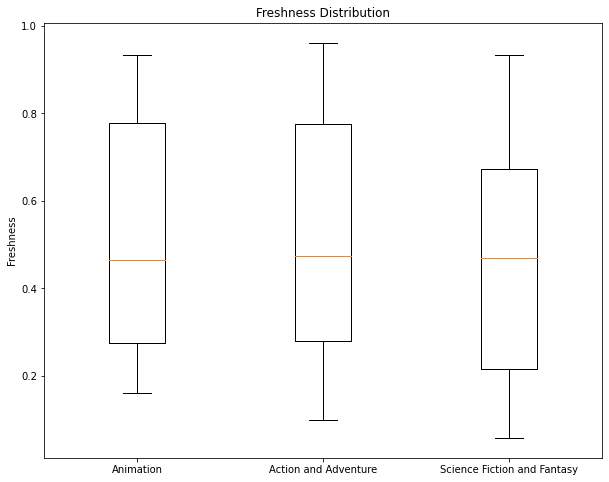

In [154]:
fig, ax = plt.subplots(figsize=(10,8))

score_dict = {'Animation': ani_scores, 'Action and Adventure': aa_scores, 'Science Fiction and Fantasy': sf_scores}

ax.boxplot(score_dict.values())
ax.set_xticklabels(score_dict.keys())
ax.set_title("Freshness Distribution")
ax.set_ylabel("Freshness");

We can see above that for Animation and Action and Adventure movies are pretty consistent in the IQR, and the max is not much higher than the 75th percentile of movies in their genre, so we should recommend writers and directors based on box office numbers.

However, Science Fiction and Fantasy movies tend to score lower, and we really want our movie to be above the 75th percentile of Science Fiction and Fantasy movies, so we should recommend writers and directors based on critical acclaim.

Finally we can use the below functions to get the top writers and directors in a given genre based on box office earnings or critical acclaim.

In [136]:
def director_genre_dataframe_box(genre):
    df = movie_details_rated_df[movie_details_rated_df.apply(lambda x: genre in x['genre_list'], axis=1)]
    genre_df = df.groupby('director').mean().sort_values(by='box_office', ascending=False)
    return genre_df

In [137]:
def director_genre_dataframe_rating(genre):
    df = movie_details_rated_df[movie_details_rated_df.apply(lambda x: genre in x['genre_list'], axis=1)]
    genre_df = df.groupby('director').mean().sort_values(by='fresh', ascending=False)
    return genre_df

In [138]:
director_genre_dataframe_box('Animation')

,id,box_office,fresh,top_critic
director,,,,
Gore Verbinski,1601,123188232.0,0.870270,0.178378
Clay Kaytis|Fergal Reilly,667,107506776.0,0.448529,0.147059
Conrad Vernon|Greg Tiernan,1890,97661826.0,0.821622,0.178378
Steve Oedekerk,1305,72601713.0,0.222222,0.296296
Jorge Blanco,357,42194060.0,0.246575,0.246575
Ron Clements|John Musker,1690,38120554.0,0.685484,0.241935
Anthony Bell|Ben Gluck|Benjamin Gluck,816,25077977.0,0.187500,0.062500
Simon Wells,482,21379315.0,0.362637,0.285714
David Bowers,1475,19548064.0,0.479339,0.231405


In [139]:
director_genre_dataframe_box('Science Fiction and Fantasy')

,id,box_office,fresh,top_critic
director,,,,
Peter Jackson,1136,303001229.0,0.621399,0.185185
Chris Columbus,1442,261835892.0,0.826087,0.212560
Steven Spielberg,841,234141872.0,0.739535,0.181395
Tim Story,443,154485963.0,0.272727,0.203209
Alex Proyas,1935,144738046.0,0.581522,0.190217
David Fincher,1017,127490802.0,0.738739,0.180180
Michel Gondry,1944,98000000.0,0.460317,0.190476
Andrew Stanton|Mark Atkins,1424,73058679.0,0.549451,0.208791
Rob Bowman,124,42929971.0,0.384058,0.224638


In [140]:
def writer_genre_dataframe_box(genre):
    df = movie_details_rated_df[movie_details_rated_df.apply(lambda x: genre in x['genre_list'], axis=1)]
    genre_df = df.groupby('writer').mean().sort_values(by='box_office', ascending=False)
    return genre_df

In [141]:
def writer_genre_dataframe_rating(genre):
    df = movie_details_rated_df[movie_details_rated_df.apply(lambda x: genre in x['genre_list'], axis=1)]
    genre_df = df.groupby('writer').mean().sort_values(by='fresh', ascending=False)
    return genre_df

In [144]:
director_genre_dataframe_box('Animation')

,id,box_office,fresh,top_critic
director,,,,
Gore Verbinski,1601,123188232.0,0.870270,0.178378
Clay Kaytis|Fergal Reilly,667,107506776.0,0.448529,0.147059
Conrad Vernon|Greg Tiernan,1890,97661826.0,0.821622,0.178378
Steve Oedekerk,1305,72601713.0,0.222222,0.296296
Jorge Blanco,357,42194060.0,0.246575,0.246575
Ron Clements|John Musker,1690,38120554.0,0.685484,0.241935
Anthony Bell|Ben Gluck|Benjamin Gluck,816,25077977.0,0.187500,0.062500
Simon Wells,482,21379315.0,0.362637,0.285714
David Bowers,1475,19548064.0,0.479339,0.231405


In [143]:
writer_genre_dataframe_rating('Animation')

,id,box_office,fresh,top_critic
writer,,,,
Tim Burton|Caroline Thompson|Michael McDowell,1180,8616662.0,0.932432,0.243243
John Logan,1601,123188232.0,0.870270,0.178378
Kyle Hunter|Ariel Shaffir|Seth Rogen|Evan Goldberg,1890,97661826.0,0.821622,0.178378
Brian Hohlfeld|Evan Spiliotopoulos,1239,18013938.0,0.807692,0.307692
Sam Levine|Alex Mann|Ron Clements|John Musker|Rob Edwards,1690,38120554.0,0.685484,0.241935
Robert Ramirez|Rhett Reese,1965,2782548.0,0.517241,0.448276
Timothy Hyde Harris|David Bowers|Timothy Harris,1475,19548064.0,0.479339,0.231405
Jon Vitti,667,107506776.0,0.448529,0.147059
Ash Brannon|Kurt Voelker,1798,9404922.0,0.428571,0.306122
